In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import sqlite3
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# newData is the sql file containing the preprocessed Data

In [4]:
conn=sqlite3.connect(r'''C:\Users\akash\ML\AMAZON/newData.sqlite''')
data=pd.read_sql_query("SELECT * FROM Reviews",conn)

In [5]:
sortedData=data.sort_values(by=["Time"],axis=0)

In [5]:
Data=sortedData.head(60000)

In [8]:
Data.head(1)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanedText
3,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...


## BAG OF WORDS

In [ ]:
D=Data.iloc[:,11]
label=Data.iloc[:,7]
print(D.shape)
print(label.shape)

xTrain,xTest,yTrain,yTest=train_test_split(D,label,test_size=0.3)
print("xTrain:{}".format(xTrain.shape))
print("xTest:{}".format(xTest.shape))
print("yTrain:{}".format(yTrain.shape))
print("yTest:{}".format(yTest.shape))


In [32]:
D=Data.iloc[:,11]

In [33]:
label=Data.iloc[:,7]

In [34]:
print(D.shape)
print(label.shape)

(60000,)
(60000,)


In [50]:
xTrain,xTest,yTrain,yTest=train_test_split(D,label,test_size=0.3)

In [51]:
print("xTrain:{}".format(xTrain.shape))
print("xTest:{}".format(xTest.shape))
print("yTrain:{}".format(yTrain.shape))

print("yTest:{}".format(yTest.shape))

xTrain:(42000,)
xTest:(18000,)
yTrain:(42000,)
yTest:(18000,)


In [15]:
model=CountVectorizer(ngram_range=(1,2))
model.fit(xTrain)
trainBOW=model.transform(xTrain)
testBOW=model.transform(xTest)

In [16]:
print(trainBOW.shape)
print(testBOW.shape)

(42000, 619112)
(18000, 619112)


## standardizing the data

In [17]:
stdDataTrain=StandardScaler(with_mean=False).fit_transform(trainBOW)

In [18]:
stdDataTrain.shape

(42000, 619112)

In [19]:
cvScores=[]
k=list(range(1,50,2))
for i in tqdm(k):
    knn=KNeighborsClassifier(n_neighbors=i,algorithm="brute")
    score=cross_val_score(knn,stdDataTrain,yTrain,cv=3,scoring="accuracy")
    cvScores.append(score.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [29:04<00:00, 73.21s/it]


optimal k is 3
error for each value of k = [0.1196 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191
 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191
 0.1191 0.1191 0.1191 0.1191 0.1191]


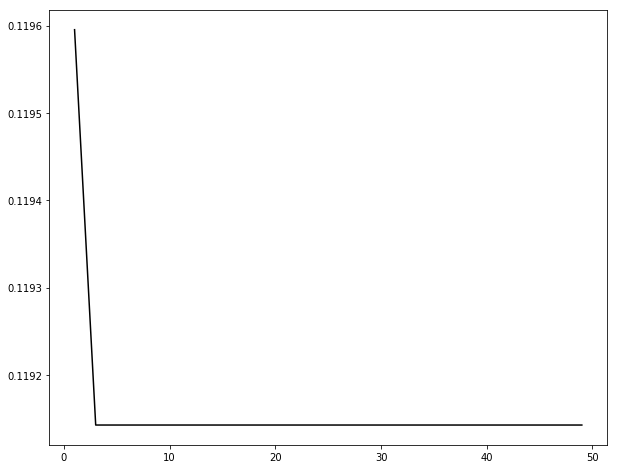

In [21]:
#ERROR
MSE=[1-x for x in cvScores]
optimalK=k[MSE.index(min(MSE))]
print("optimal k is {}".format(optimalK))
print("error for each value of k = {}".format(np.round(MSE,4)))
plt.figure(figsize=(10,8))
plt.plot(k,MSE,color="black")


In [41]:
knn=KNeighborsClassifier(n_neighbors=3,algorithm="brute")
knn.fit(stdDataTrain,yTrain)


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
predicted=knn.predict(testBOW)


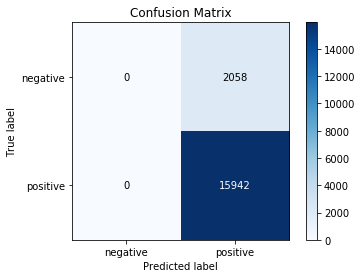

In [43]:
import scikitplot.metrics
scikitplot.metrics.plot_confusion_matrix(yTest,predicted)

## observation:
from confusion metrics it is clear that model is dumb.it is predicting everything to be positive.

# using kdTree  algorithm

In [6]:
Data=sortedData.head(60000)

In [7]:
D=Data.iloc[:,[11,7]]

In [8]:
train, validate, test = np.split(D.sample(frac=1), [int(.6*len(D)), int(.8*len(D))])

In [9]:
xTrain=train["cleanedText"]
yTrain=train["Score"]
xcv=validate["cleanedText"]
ycv=validate["Score"]
xtest=test["cleanedText"]
ytest=test["Score"]

In [10]:
print("shapes*****")
print("xTrain : {}".format(xTrain.shape))
print("yTrain : {}".format(yTrain.shape))
print("xcv : {}".format(xcv.shape))
print("ycv : {}".format(ycv.shape))
print("xtest : {}".format(xtest.shape))
print("ytest : {}".format(ytest.shape))

shapes*****
xTrain : (36000,)
yTrain : (36000,)
xcv : (12000,)
ycv : (12000,)
xtest : (12000,)
ytest : (12000,)


In [19]:
model=CountVectorizer()
model.fit(xTrain)
trainBOW=model.transform(xTrain)
cvBOW=model.transform(xcv)
testBOW=model.transform(xtest)

In [22]:
stdDataTrain=StandardScaler(with_mean=False).fit_transform(trainBOW)

In [23]:
stdDataTrain.shape

(36000, 22524)

In [24]:
stdDatacv=StandardScaler(with_mean=False).fit_transform(cvBOW)

In [25]:
stdDatacv.shape

(12000, 22524)

In [26]:
from sklearn import decomposition
svd=decomposition.TruncatedSVD()
svd.n_components=8000
svd_data=svd.fit_transform(stdDataTrain)

In [36]:
svd_data.shape

(36000, 8000)

In [28]:
svdCV=svd.fit_transform(stdDatacv)

In [29]:
reducedTest=svd.fit_transform(testBOW)

In [35]:
reducedTest.shape

(12000, 8000)

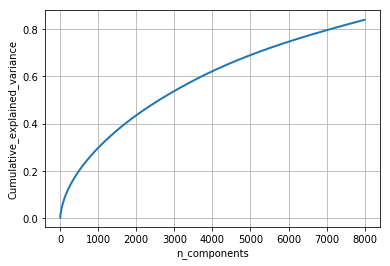

In [27]:
cumulative_explained_variance=np.cumsum(svd.explained_variance_ratio_)
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cumulative_explained_variance, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


In [30]:
cvScores=[]
k=list(range(1,30,2))
for i in tqdm(k):
    knn=KNeighborsClassifier(n_neighbors=i,algorithm="kd_tree")
    score=cross_val_score(knn,svdCV,ycv,cv=3,scoring="accuracy")
    cvScores.append(score.mean())


100%|██████████████████████████████████████████████████████████████████████████████| 15/15 [7:18:16<00:00, 1527.71s/it]


optimal k is 5
error for each value of k = [0.1552 0.1239 0.1189 0.1195 0.1191 0.119  0.1192 0.1192 0.1193 0.1193
 0.1193 0.1193 0.1193 0.1193 0.1193]


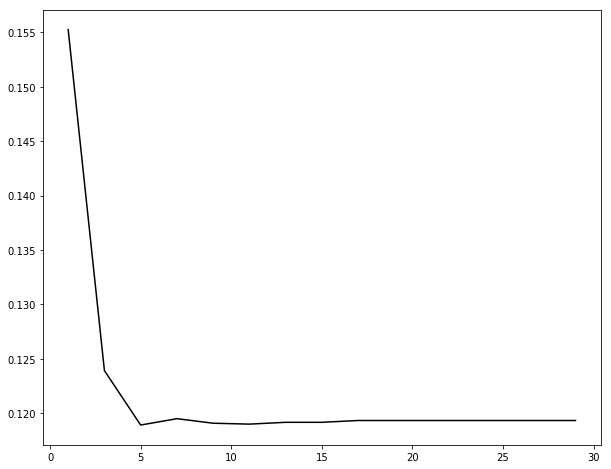

In [31]:
#ERROR
MSE=[1-x for x in cvScores]
optimalK=k[MSE.index(min(MSE))]
print("optimal k is {}".format(optimalK))
print("error for each value of k = {}".format(np.round(MSE,4)))
plt.figure(figsize=(10,8))
plt.plot(k,MSE,color="black")


In [37]:
knn=KNeighborsClassifier(n_neighbors=optimalK,algorithm="kd_tree")
knn.fit(svd_data,yTrain)



KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
predicted=knn.predict(reducedTest)

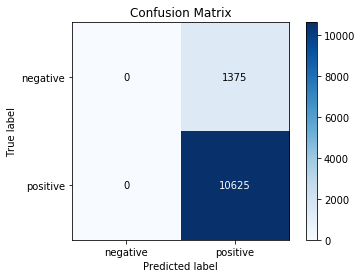

In [39]:
import scikitplot.metrics
scikitplot.metrics.plot_confusion_matrix(ytest,predicted)

## observation:
the result for both brute force and kd_tree is samne.both are not able to predict the negative reviews. they are predicting every review as positive.

# TFIDF

In [66]:
xTrain,xTest,yTrain,yTest=train_test_split(D,label,test_size=0.3)

In [67]:
print("xTrain:{}".format(xTrain.shape))
print("xTest:{}".format(xTest.shape))
print("yTrain:{}".format(yTrain.shape))

print("yTest:{}".format(yTest.shape))

xTrain:(42000,)
xTest:(18000,)
yTrain:(42000,)
yTest:(18000,)


In [68]:
model=TfidfVectorizer()
model.fit(xTrain)
trainTFIDF=model.transform(xTrain)
testTFIDF=model.transform(xTest)

In [69]:
features=model.get_feature_names()

In [55]:
stdTrainTFIDF=StandardScaler(with_mean=False).fit_transform(trainTFIDF)

In [56]:
stdTrainTFIDF.shape

(42000, 24365)

In [57]:
cvScores=[]
k=list(range(1,50,2))
for i in tqdm(k):
    knn=KNeighborsClassifier(n_neighbors=i,algorithm="brute")
    score=cross_val_score(knn,stdTrainTFIDF,yTrain,cv=3,scoring="accuracy")
    cvScores.append(score.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [15:16<00:00, 37.25s/it]


optimal k is 7
error for each value of k = [0.15 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12]


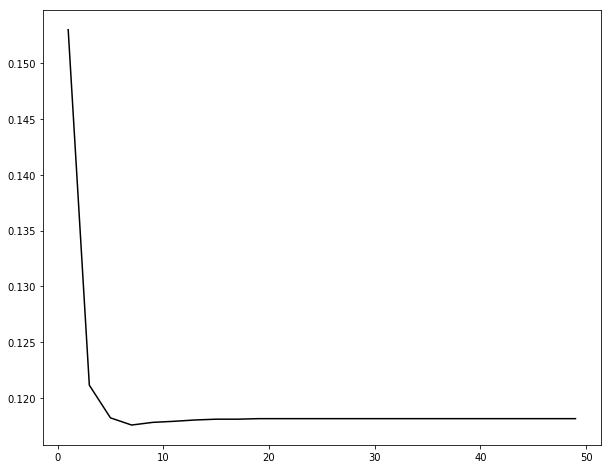

In [58]:
#ERROR
MSE=[1-x for x in cvScores]
optimalK=k[MSE.index(min(MSE))]
print("optimal k is {}".format(optimalK))
print("error for each value of k = {}".format(np.round(MSE,2)))
plt.figure(figsize=(10,8))
plt.plot(k,MSE,color="black")


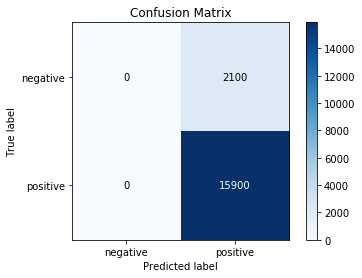

In [60]:
knn=KNeighborsClassifier(n_neighbors=3,algorithm="brute")
knn.fit(stdTrainTFIDF,yTrain)

predicted=knn.predict(testTFIDF)

scikitplot.metrics.plot_confusion_matrix(yTest,predicted)

## observation:
same scenario with tfidf model is predicting every review to be positive. 

# using kdTree algo

In [11]:
Data=sortedData.head(60000)
D=Data.iloc[:,[11,7]]
train, validate, test = np.split(D.sample(frac=1), [int(.6*len(D)), int(.8*len(D))])

xTrain=train["cleanedText"]
yTrain=train["Score"]
xcv=validate["cleanedText"]
ycv=validate["Score"]
xtest=test["cleanedText"]
ytest=test["Score"]

print("shapes*****")
print("xTrain : {}".format(xTrain.shape))
print("yTrain : {}".format(yTrain.shape))
print("xcv : {}".format(xcv.shape))
print("ycv : {}".format(ycv.shape))
print("xtest : {}".format(xtest.shape))
print("ytest : {}".format(ytest.shape))

shapes*****
xTrain : (36000,)
yTrain : (36000,)
xcv : (12000,)
ycv : (12000,)
xtest : (12000,)
ytest : (12000,)


In [12]:
model=TfidfVectorizer()
model.fit(xTrain)
trainTFIDF=model.transform(xTrain)
cvTFIDF=model.transform(xcv)
testTFIDF=model.transform(xtest)

In [13]:
print(trainTFIDF.shape)
print(cvTFIDF.shape)
print(testTFIDF.shape)

(36000, 22531)
(12000, 22531)
(12000, 22531)


In [14]:
stdDataTrain=StandardScaler(with_mean=False).fit_transform(trainTFIDF)
print(stdDataTrain.shape)
stdDatacv=StandardScaler(with_mean=False).fit_transform(cvTFIDF)
print(stdDatacv.shape)

(36000, 22531)
(12000, 22531)


In [18]:
from sklearn import decomposition
svd=decomposition.TruncatedSVD()
svd.n_components=12000
svd_data=svd.fit_transform(stdDataTrain)

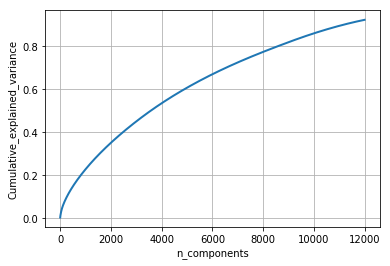

In [19]:
cumulative_explained_variance=np.cumsum(svd.explained_variance_ratio_)
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cumulative_explained_variance, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [20]:
svdCV=svd.fit_transform(stdDatacv)

In [21]:
reducedTest=svd.fit_transform(testBOW)

In [22]:
cvScores=[]
k=list(range(1,30,2))
for i in tqdm(k):
    knn=KNeighborsClassifier(n_neighbors=i,algorithm="kd_tree")
    score=cross_val_score(knn,svdCV,ycv,cv=3,scoring="accuracy")
    cvScores.append(score.mean())

100%|█████████████████████████████████████████████████████████████████████████████| 15/15 [11:54:34<00:00, 2082.07s/it]


optimal k is 7
error for each value of k = [0.1482 0.1216 0.1192 0.119  0.119  0.119  0.119  0.119  0.119  0.119
 0.119  0.119  0.119  0.119  0.119 ]


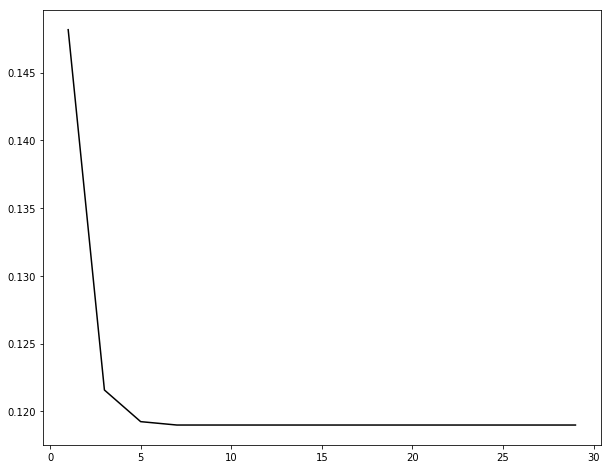

In [23]:
#ERROR
MSE=[1-x for x in cvScores]
optimalK=k[MSE.index(min(MSE))]
print("optimal k is {}".format(optimalK))
print("error for each value of k = {}".format(np.round(MSE,4)))
plt.figure(figsize=(10,8))
plt.plot(k,MSE,color="black")


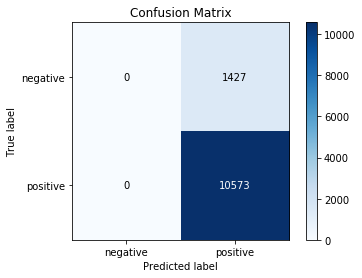

In [24]:
knn=KNeighborsClassifier(n_neighbors=optimalK,algorithm="kd_tree")
knn.fit(svd_data,yTrain)
predicted=knn.predict(reducedTest)
import scikitplot.metrics
scikitplot.metrics.plot_confusion_matrix(ytest,predicted)

# observation:
same case as with the brute force algorithm

## AVGword2vec

In [73]:
xTrain,xTest,yTrain,yTest=train_test_split(D,label,test_size=0.3,random_state=42)

In [74]:
lst=[]
for tlst in xTrain:
    lst.append(tlst.split())

In [75]:
test=[]
for x in xTest:
    test.append(x.split())

In [77]:
from gensim.models import Word2Vec
modelw2v=Word2Vec(lst,min_count=5,size=50)

In [78]:
words=list(modelw2v.wv.vocab)

## for train

In [80]:
sent_vect=[]
for lt in tqdm(lst):
    Svec=np.zeros(50)
    cnt=0
    for word in lt:
        if word in words:
            vec=modelw2v.wv[word]
            Svec+=vec
            cnt+=1
    if cnt!=0:
        sent_vect.append(Svec/cnt)
            
            

100%|██████████████████████████████████████████████████████████████████████████| 42000/42000 [00:26<00:00, 1581.98it/s]


## for test

In [83]:
sent_vect_test=[]
for lt in tqdm(test):
    Svec=np.zeros(50)
    cnt=0
    for word in lt:
        if word in words:
            vec=modelw2v.wv[word]
            Svec+=vec
            cnt+=1
    if cnt!=0:
        sent_vect_test.append(Svec/cnt)

100%|██████████████████████████████████████████████████████████████████████████| 18000/18000 [00:11<00:00, 1554.89it/s]


## finding the best hyperparameter

In [84]:
cvScores=[]
k=list(range(1,50,2))
for i in tqdm(k):
    knn=KNeighborsClassifier(n_neighbors=i,algorithm="brute")
    score=cross_val_score(knn,sent_vect,yTrain,cv=3,scoring="accuracy")
    cvScores.append(score.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [08:02<00:00, 20.45s/it]


optimal k is 17
error for each value of k = [0.1469 0.119  0.1113 0.1088 0.108  0.1074 0.107  0.1071 0.1068 0.1072
 0.1071 0.1073 0.1072 0.1073 0.1077 0.1076 0.1078 0.1077 0.1083 0.1085
 0.1087 0.109  0.1091 0.1091 0.1092]


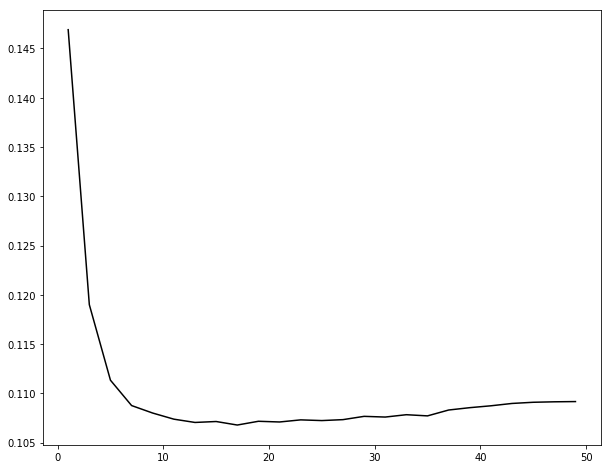

In [85]:
#ERROR
MSE=[1-x for x in cvScores]
optimalK=k[MSE.index(min(MSE))]
print("optimal k is {}".format(optimalK))
print("error for each value of k = {}".format(np.round(MSE,4)))
plt.figure(figsize=(10,8))
plt.plot(k,MSE,color="black")


In [86]:
knn=KNeighborsClassifier(n_neighbors=optimalK,algorithm="brute")
knn.fit(sent_vect,yTrain)


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

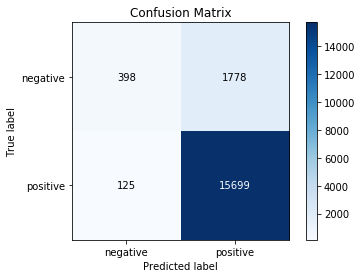

In [87]:
predicted=knn.predict(sent_vect_test)
scikitplot.metrics.plot_confusion_matrix(yTest,predicted)

## observation:
this model is better as comapred to above 2 models.it is able to predict the negative reviews.but we cant say its as the best as false positive is high(as well as false negative)

# KDTREE ALGORITHM

In [88]:
cvScores=[]
k=list(range(1,50,2))
for i in tqdm(k):
    knn=KNeighborsClassifier(n_neighbors=i,algorithm="kd_tree")
    score=cross_val_score(knn,sent_vect,yTrain,cv=3,scoring="accuracy")
    cvScores.append(score.mean())

100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [51:47<00:00, 125.12s/it]


optimal k is 17
error for each value of k = [0.1469 0.119  0.1113 0.1088 0.108  0.1074 0.107  0.1071 0.1068 0.1072
 0.1071 0.1073 0.1072 0.1073 0.1077 0.1076 0.1078 0.1077 0.1083 0.1085
 0.1087 0.109  0.1091 0.1091 0.1092]


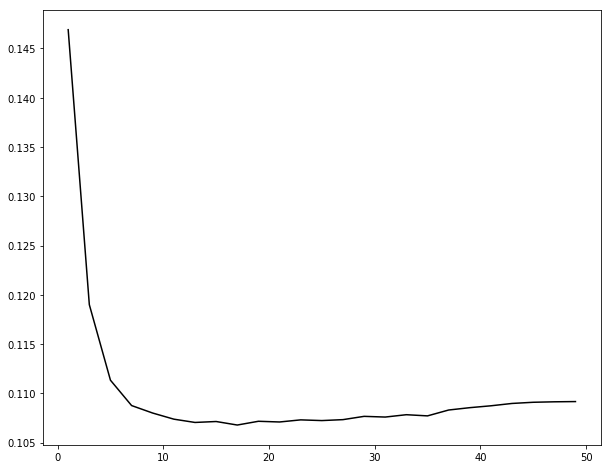

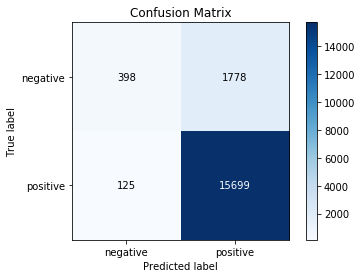

In [89]:
#ERROR
MSE=[1-x for x in cvScores]
optimalK=k[MSE.index(min(MSE))]
print("optimal k is {}".format(optimalK))
print("error for each value of k = {}".format(np.round(MSE,4)))
plt.figure(figsize=(10,8))
plt.plot(k,MSE,color="black")

knn=KNeighborsClassifier(n_neighbors=optimalK,algorithm="kd_tree")
knn.fit(sent_vect,yTrain)

predicted=knn.predict(sent_vect_test)
scikitplot.metrics.plot_confusion_matrix(yTest,predicted)


## observation:
no change as we compare to brute force,same results!

# TFIDF weighted word2vec

## for train

In [92]:
features=model.get_feature_names()
sent_vec=[]
row=0
for x in tqdm(xTrain):
    sVec=np.zeros(50)
    weight=0
    for word in x:
        if word in words:
            vec=modelw2v.wv[word]
            tfidf=trainTFIDF[row,features.index(word)]
            sVec+=(vec*tfidf)
            weight+=tfidf
    if(weight!=0):
        sent_vec.append(sVec/weight)
    row+=1    

100%|████████████████████████████████████████████████████████████████████████████| 42000/42000 [23:26<00:00, 29.85it/s]


## for test

In [94]:
sent_vec_test=[]
row=0
for x in tqdm(xTest):
    sVec=np.zeros(50)
    weight=0
    for word in x:
        if word in words:
            vec=modelw2v.wv[word]
            tfidf=testTFIDF[row,features.index(word)]
            sVec+=(vec*tfidf)
            weight+=tfidf
    if(weight!=0):
        sent_vec_test.append(sVec/weight)
    row+=1 

100%|████████████████████████████████████████████████████████████████████████████| 18000/18000 [11:49<00:00, 33.78it/s]


## calculating best hyperparameter

In [95]:
cvScores=[]
k=list(range(1,50,2))
for i in tqdm(k):
    knn=KNeighborsClassifier(n_neighbors=i,algorithm="brute")
    score=cross_val_score(knn,sent_vect,yTrain,cv=3,scoring="accuracy")
    cvScores.append(score.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [12:46<00:00, 31.48s/it]


optimal k is 17
error for each value of k = [0.1469 0.119  0.1113 0.1088 0.108  0.1074 0.107  0.1071 0.1068 0.1072
 0.1071 0.1073 0.1072 0.1073 0.1077 0.1076 0.1078 0.1077 0.1083 0.1085
 0.1087 0.109  0.1091 0.1091 0.1092]


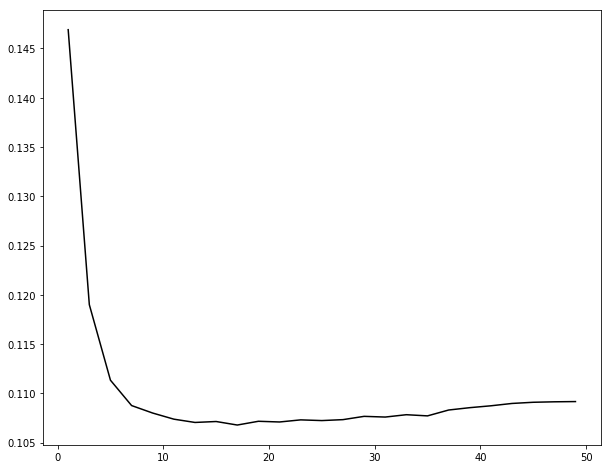

In [96]:
#ERROR
MSE=[1-x for x in cvScores]
optimalK=k[MSE.index(min(MSE))]
print("optimal k is {}".format(optimalK))
print("error for each value of k = {}".format(np.round(MSE,4)))
plt.figure(figsize=(10,8))
plt.plot(k,MSE,color="black")

In [97]:
knn=KNeighborsClassifier(n_neighbors=optimalK,algorithm="brute")
knn.fit(sent_vect,yTrain)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

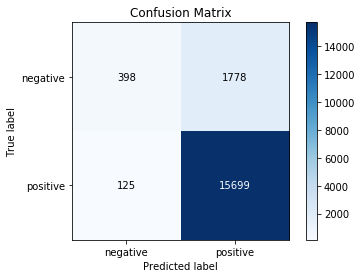

In [98]:
predicted=knn.predict(sent_vect_test)
scikitplot.metrics.plot_confusion_matrix(yTest,predicted)

## observation:
no cahnge ,predicting a lot of negative points as positive and positive as negative.

## using kdtree

In [99]:
cvScores=[]
k=list(range(1,50,2))
for i in tqdm(k):
    knn=KNeighborsClassifier(n_neighbors=i,algorithm="kd_tree")
    score=cross_val_score(knn,sent_vect,yTrain,cv=3,scoring="accuracy")
    cvScores.append(score.mean())

100%|███████████████████████████████████████████████████████████████████████████████| 25/25 [1:19:33<00:00, 196.90s/it]


## evaluating bestK and confusion matrics

optimal k is 17
error for each value of k = [0.1469 0.119  0.1113 0.1088 0.108  0.1074 0.107  0.1071 0.1068 0.1072
 0.1071 0.1073 0.1072 0.1073 0.1077 0.1076 0.1078 0.1077 0.1083 0.1085
 0.1087 0.109  0.1091 0.1091 0.1092]


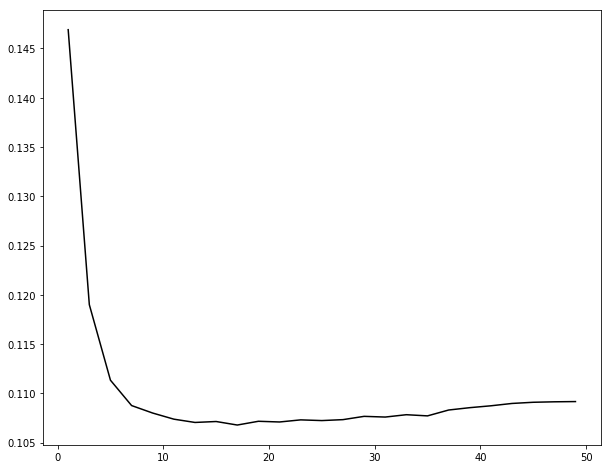

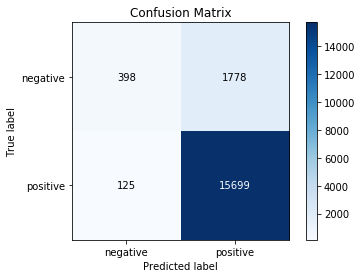

In [100]:
#ERROR
MSE=[1-x for x in cvScores]
optimalK=k[MSE.index(min(MSE))]
print("optimal k is {}".format(optimalK))
print("error for each value of k = {}".format(np.round(MSE,4)))
plt.figure(figsize=(10,8))
plt.plot(k,MSE,color="black")

knn=KNeighborsClassifier(n_neighbors=optimalK,algorithm="kd_tree")
knn.fit(sent_vect,yTrain)

predicted=knn.predict(sent_vect_test)
scikitplot.metrics.plot_confusion_matrix(yTest,predicted)

# observation:
same model as above!

In [104]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["vectorizer", "model", "hyperparameter"]

x.add_row(["BOW", "brute", 3])
x.add_row(["BOW", "kd_tree", 5])
x.add_row(["TFIDF","brute", 7])
x.add_row(["TFIDF","kd_tree", 7])
x.add_row(["AVGw2V", "brute", 17])
x.add_row(["tfidfW2v","kd_tree", 17])
print(x)

+------------+---------+----------------+
| vectorizer |  model  | hyperparameter |
+------------+---------+----------------+
|    BOW     |  brute  |       3        |
|    BOW     | kd_tree |       5        |
|   TFIDF    |  brute  |       7        |
|   TFIDF    | kd_tree |       7        |
|   AVGw2V   |  brute  |       17       |
|  tfidfW2v  | kd_tree |       17       |
+------------+---------+----------------+
